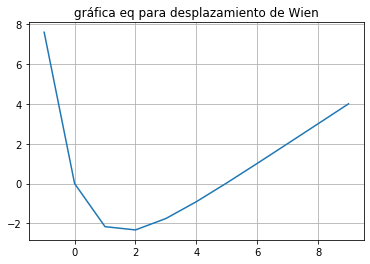


Búsqueda incremental: Existe una raíz entre 4.965114000134902 y 4.965115000134902
### Siendo el valor aproximado:  4.965114231744276   (según Wikipedia) ###
error aparente :  2.0140520413174882e-07    < 1e-06

Método Bisección: Existe una raíz entre 4.965110778808594 y 4.965114593505859
### Siendo el valor aproximado:  4.965114231744276   (según Wikipedia) ###
error aparente :  7.683005345835119e-07    < 1e-06
número aprox de iteraciones para este rango inicial: 19

Método Falsa Posición: Existe una raíz entre 4.965114231744065 y 5
### Siendo el valor aproximado:  4.965114231744276   (según Wikipedia) ###
error aparente :  0.006977153651187074    > 1e-06


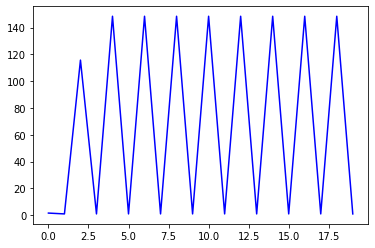


El método de punto fijo diverge **ver gráfica del error
posible razón: exponencial negativo, el cual al tomar cierto valor cambia de signo y hace crecer rápidamente a la función

Newton-Raphson: Exite una raíz entre 4.965114295956012 y 4.965114231744276
error aparente :  1.293257987136808e-08    < 1e-06


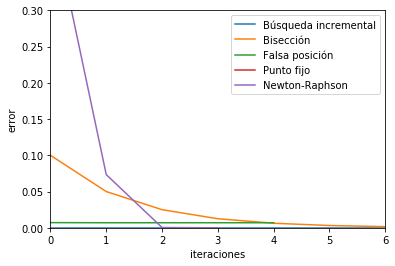

Según la gráfica, para esta ecuación en especial, cualquier método bajo Newton-Raphon nos acercaría más al resultado


In [7]:
#! /usr/bin/python3


import numpy as np
import math 
#import matplotlib.pyplot as plt 
#from matplotlib.pyplot import figure
import pylab 

import warnings
warnings.filterwarnings("ignore")


#Comienzo a graficar en un rango "grande" para ver aproximadamente donde se encuentra una raiz
#primero analicé la imagen a gran escala y luego decidí por este rango pequeño de la imagen
X=[]
Y=[]
for ix in range (-1,10,1):
    xk=5*math.exp(-ix)+ix-5
    Y.append(xk)
    X.append(ix)
pylab.grid()
pylab.plot(X,Y)
pylab.title("gráfica eq para desplazamiento de Wien")
pylab.show()


def f(ix):                           #defino la eq como funcion para que luego
     return 5*math.exp(-ix)+ix-5     #sea llamada con más comodidad
    
def e_ap(xup,xlow):                  #funcion para el error aparente
    return abs((xup-xlow)/xup)

xw = 4.965114231744276  #valor aprox para la raíz según wikipedia 
ep= 10**(-6)

########################################
#####     BUSQUEDA INCREMENTAL     #####

E_bi=[]  #array para errores

paso  = 0.000001
xl= 4
xu= 4
flag = f(xl)*f(xu)  

while flag >0 :     #solo saldrá del loop cuando sea negativo e imprimirá los valores para flag<0
    xl= xu
    xu= xl + paso
    flag = f(xl)*f(xu)
    ea_bi= e_ap(xu,xl)
    E_bi.append(ea_bi)
    

#plt.plot(E_bi,'r+') 
print("")
print("Búsqueda incremental: Existe una raíz entre",xl,"y",xu)
print("### Siendo el valor aproximado: ", xw , "  (según Wikipedia) ###")
print("error aparente : ", e_ap(xu,xl), "   <", ep)

#######################################
#####     METODO DE BISECCION     #####
E_bisec=[]   #array para errores
#prueba de nro de iteraciones necesarias
def iteraciones(error_i, epsilon):
    return math.log((error_i/epsilon), 2)
#determino mi rango inicial
ai=4
bi=5
#hallo pto medio
ea_bsx = 1

while ea_bsx > ep :
    m = (bi+ai)/2
    if f(ai)*f(m)<0 :
        bi=m
    if f(m)*f(bi)<0 :
        ai=m
    ea_bsx = e_ap(bi,ai)
    E_bisec.append(ea_bsx)
    #print(m)
#plt.plot(E_bisec,'b') 
print("")
print("Método Bisección: Existe una raíz entre",ai,"y",bi)
print("### Siendo el valor aproximado: ", xw , "  (según Wikipedia) ###")
print("error aparente : ", e_ap(ai,bi), "   <", ep)
print("número aprox de iteraciones para este rango inicial:", int(math.log((5-4)/ep, 2)))

#######################################################
#####     METODO DE FALSA POSICION    ##### Nota: sigue casi el mis proceso que la bisección
E_fpos=[]   #array para errores
#determino mi rango inicial
p=4
q=5

#hallo pto medio
ea_fp = 1

#NOTA: después de correr el programa un par de veces noté que el error aparente
#no cambiaba a partir de la 4ta iteración, por esa razón, para evitar
#hacer todos los cálculos innecesarios, decidí hacer solo 5 iteraciones
#este es uno de los pros y contras de este método
#converge rápido 
#pero también dará resultados un poco más alejados que los métodos anteriores

for i in range (0, 5, 1) :  
    xr = q - f(q)*(p-q)/(f(p)-f(q))
    if f(p)*f(xr)<0 :
        q=xr
    if f(xr)*f(q)<0 :
        p=xr
    ea_fp = e_ap(q,p)
    E_fpos.append(ea_fp)
    #print(ea_fp)
    
#plt.plot(E_fpos,'b')
print("")    
print("Método Falsa Posición: Existe una raíz entre",p,"y",q)
print("### Siendo el valor aproximado: ", xw , "  (según Wikipedia) ###")
print("error aparente : ", e_ap(q,p), "   >", ep)


###############################
#####     FIXED POINT     #####
#debemos reescribir la funcion de modo que fijamos x
def punto_fijo(xd):
    return 5*math.exp(-xd)-5
#array para errores
E_pfijo=[]
#fijamos el primer punto, probamos
xo=3
#después de analizar el error, noté que los puntos xo y xr
#se mantenian. Generé 20 iteraciones solo para
#apreciar la divergencia del error

for i in range (0, 20, 1) : 
    xir = punto_fijo(xo)
    #print(xo,xir)
    ea_pfijo = e_ap(xir,xo)
    E_pfijo.append(ea_pfijo)
    xo=xir

pylab.plot(E_pfijo,'b')
pylab.show()
print("")    
print("El método de punto fijo diverge **ver gráfica del error")
print("posible razón: exponencial negativo, el cual al tomar cierto valor cambia de signo y hace crecer rápidamente a la función") 

######################
### NEWTON RAPHSON ###
#función para diferenciar
def derivada(xv):
    return -5*math.exp(-xv)+1
#array para errores
E_nr=[]
    
#valor inicial
xor=3
for i in range (1,5,1):
    df=derivada(xor)
    xnr= xor - f(xor)/(df)
    e_nr=e_ap(xnr,xor)
    E_nr.append(e_nr)
    xd=xor                 #para poder imprimir el valor
    xor=xnr


#plt.plot(E_nr)
print("")    
print("Newton-Raphson: Exite una raíz entre",xd,"y",xnr)
print("error aparente : ", e_ap(xnr,xd), "   <", ep)



pylab.xlim(right=6)
pylab.xlim(left=0)
pylab.ylim(top=0.30)
pylab.ylim(bottom=0)
pylab.plot(E_bi, label = "Búsqueda incremental")
pylab.plot(E_bisec, label = "Bisección")
pylab.plot(E_fpos, label = "Falsa posición")
pylab.plot(E_pfijo, label = "Punto fijo")
pylab.plot(E_nr, label = "Newton-Raphson")


pylab.legend() 
pylab.ylabel('error')
pylab.xlabel('iteraciones')
pylab.show()
print("Según la gráfica, para esta ecuación en especial, cualquier método bajo Newton-Raphon nos acercaría más al resultado")

